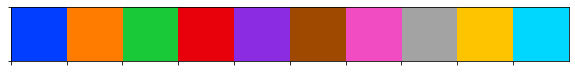

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
palette1 = sns.color_palette("BuGn", 3) \
           + sns.color_palette("OrRd", 3) \
           + sns.color_palette("PuBu", 3) \
           + sns.color_palette("RdGy", 6)[::-1][:1]
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/CSSEGISandData/COVID-19/
# transpose matrices for better data handling

# update from source
! curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv > ../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
! curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv > ../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
! curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv > ../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

# confirmed COVID-19 positive cases
conf = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv").transpose()
# deceased cases
deaths = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv").transpose()
# recovery cases
recover = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv").transpose()

conf.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 63085  100 63085    0     0  63085      0  0:00:01 --:--:--  0:00:01 68421
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 51456  100 51456    0     0  51456      0  0:00:01 --:--:--  0:00:01  114k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:

,0,1,2,3,4,5,6,7,8,9,...,253,254,255,256,257,258,259,260,261,262
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,"Bonaire, Sint Eustatius and Saba",NaN,Falkland Islands (Malvinas),Saint Pierre and Miquelon,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Botswana,Burundi,Sierra Leone,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe
Lat,33,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,-22.3285,-3.3731,8.46056,12.1784,-13.2543,-51.7963,46.8852,6.877,24.2155,0.18636
Long,65,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,24.6849,29.9189,-11.7799,-68.2385,34.3015,-59.5236,-56.3159,31.307,-12.8858,6.61308
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# assign second row as column names
conf.columns = conf.iloc[1]
deaths.columns = deaths.iloc[1]
recover.columns = recover.iloc[1]

In [4]:
# remove first 4 rows
conf = conf.iloc[4:]
deaths = deaths.iloc[4:]
recover = recover.iloc[4:]

In [5]:
# list contry names
# set(list(conf.columns.values))

In [6]:
# data are divided by province: sum provinces to obtain numbers by country
# China was not affected uniformly, therefore the population scaled numbers appear low (I will add the provence numbers lated)
conf = conf.groupby(by=conf.columns, axis=1).sum()
deaths = deaths.groupby(by=deaths.columns, axis=1).sum()
recover = recover.groupby(by=recover.columns, axis=1).sum()

In [7]:
# pos_1_10 = conf.max().sort_values(ascending=False)[:10].index
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

Country/Region
US                429052.0
Spain             148220.0
Italy             139422.0
France            113959.0
Germany           113296.0
China              82809.0
Iran               64586.0
United Kingdom     61474.0
Turkey             38226.0
Belgium            23403.0
dtype: float64


In [8]:
# select only countries with > 900 positive COVID-19 cases
# selected_columns = conf.max()>900
# selected_columns = conf.max().sort_values(ascending=False)[:10]
# conf = conf.loc[:,selected_columns]
# deaths = deaths.loc[:,selected_columns]
# recover = recover.loc[:,selected_columns]

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

In [9]:
def make_plot(dataset="", contries_ordered="", plot_countries_opt=1,
              nrow=2,ncol=2,plot_countries_option = 1, title="", 
              xlabel="", ylabel="", logy=False, logx=False):
    count=0
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

    for r in range(nrow):
        for c in range(ncol):
            if plot_countries_opt == 1:
                plot_countries = contries_ordered[count*10:(count+1)*10].index
            else:
                plot_countries = contries_ordered[count*10:(count+1)*10]
                
            dataset[plot_countries].plot(logy=logy, logx=logx, grid=True, ax=axes[r,c], title=title, figsize = (20,10./2*nrow))
            axes[r,c].set_xlabel(xlabel, fontsize=15)
            axes[r,c].set_ylabel(ylabel, fontsize=15)
            count+=1

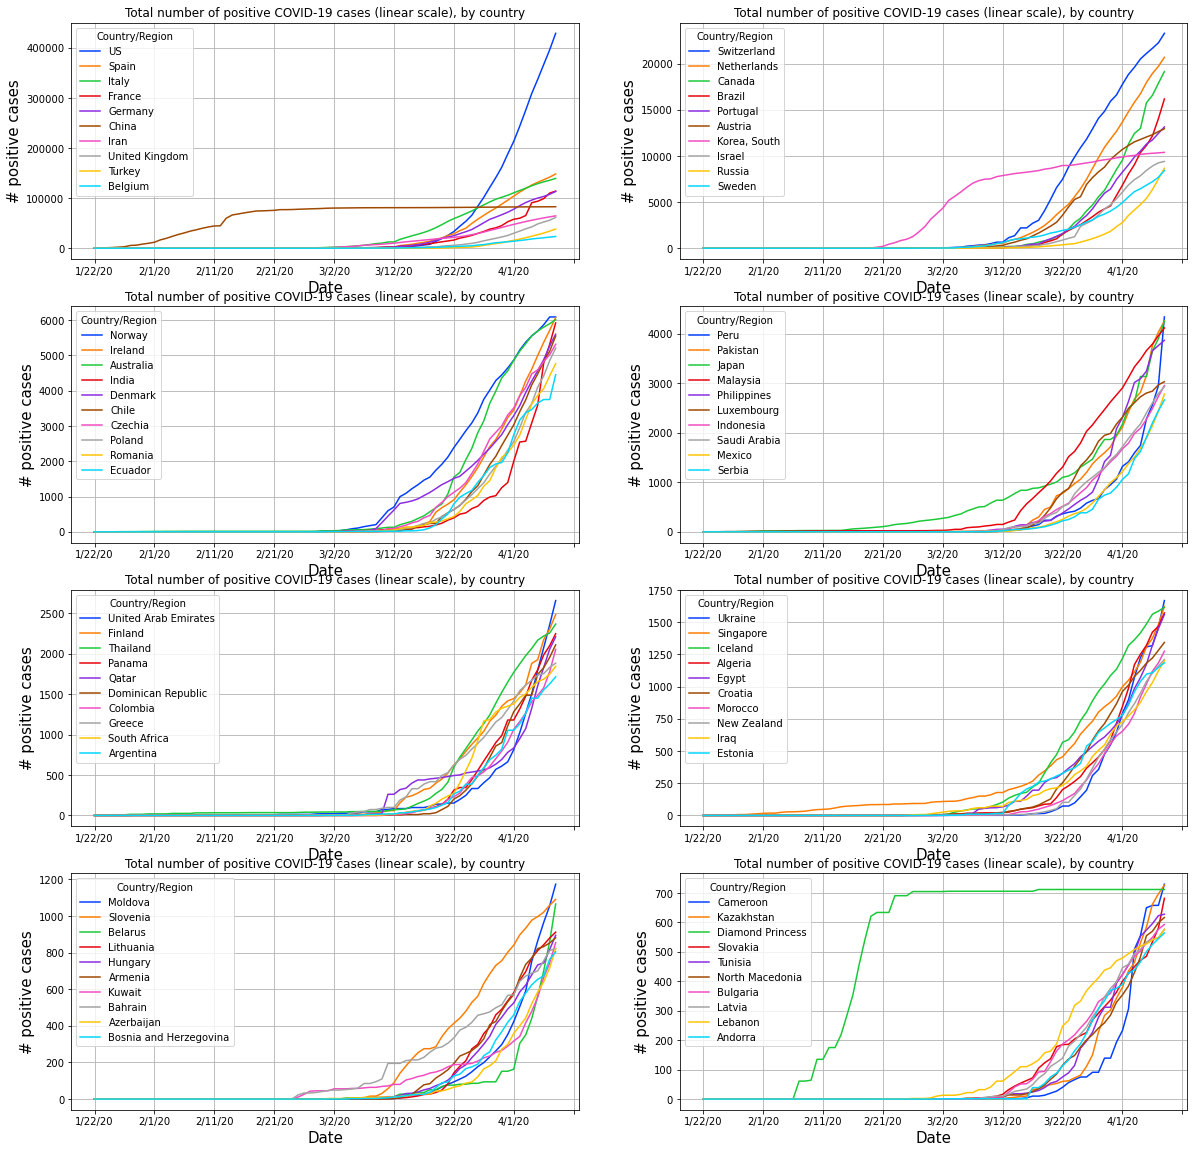

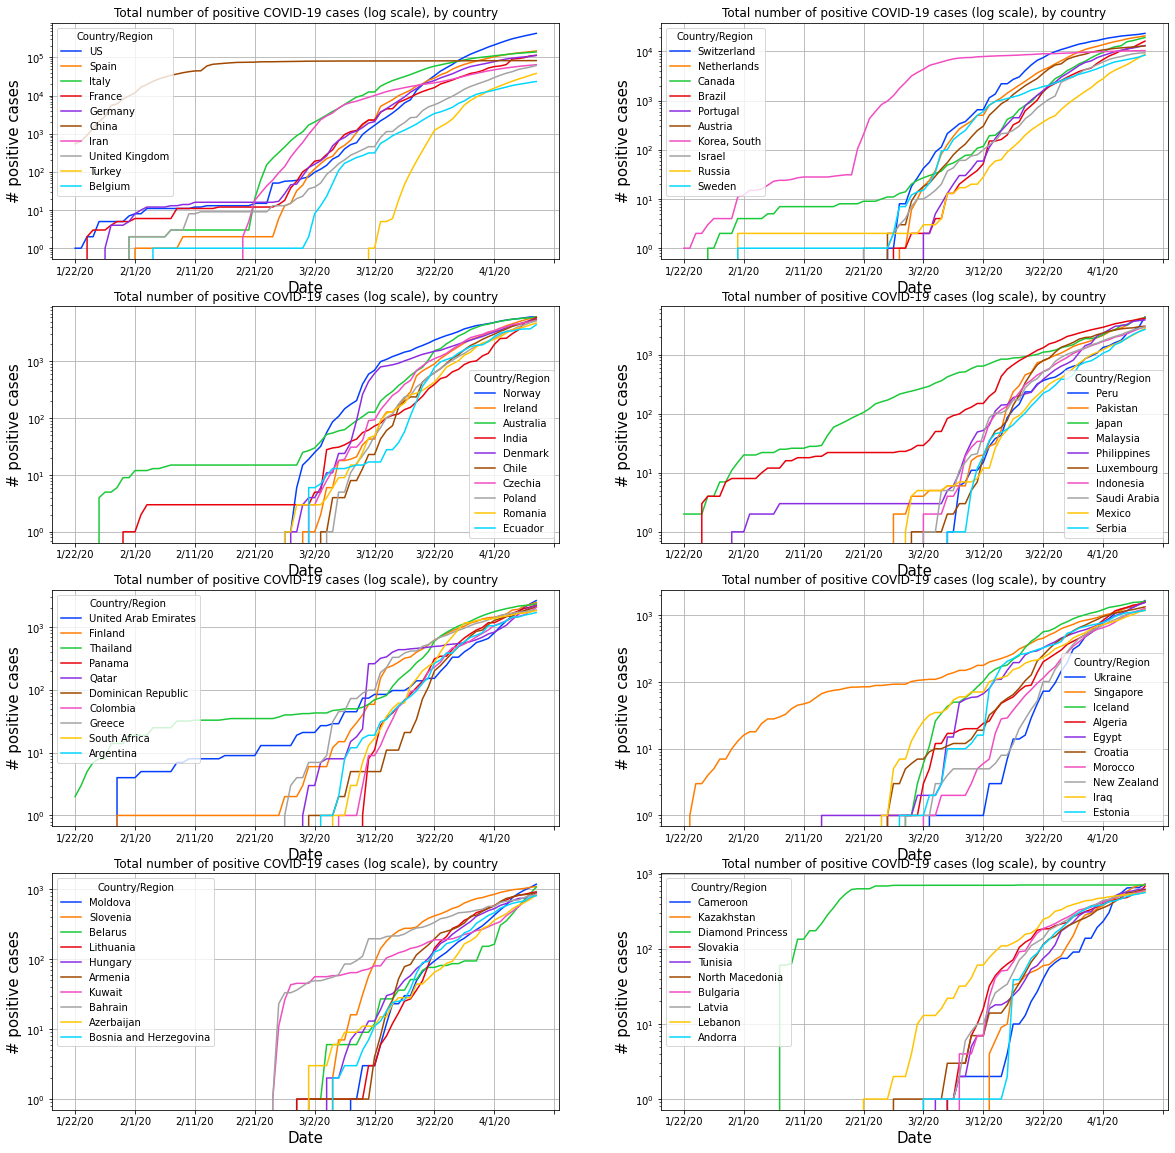

In [10]:
make_plot(dataset=conf, nrow=4,ncol=2, contries_ordered=contries_ordered,
          title='Total number of positive COVID-19 cases (linear scale), by country',
          xlabel="Date", ylabel="# positive cases")

make_plot(dataset=conf, nrow=4,ncol=2, contries_ordered=contries_ordered,
          title='Total number of positive COVID-19 cases (log scale), by country',
          xlabel="Date", ylabel="# positive cases",
         logy=True)

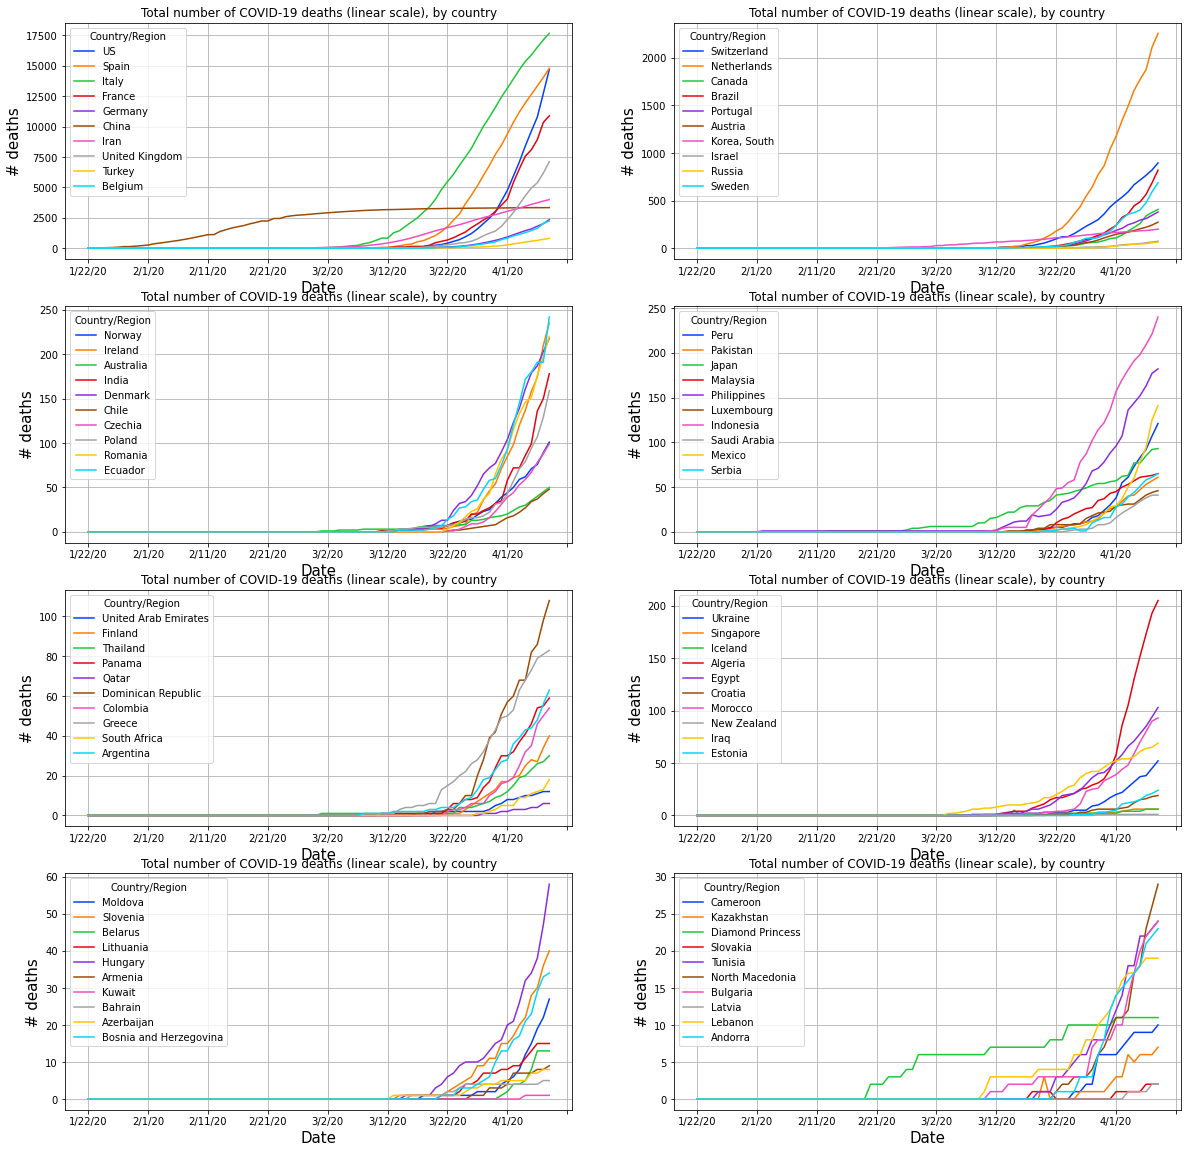

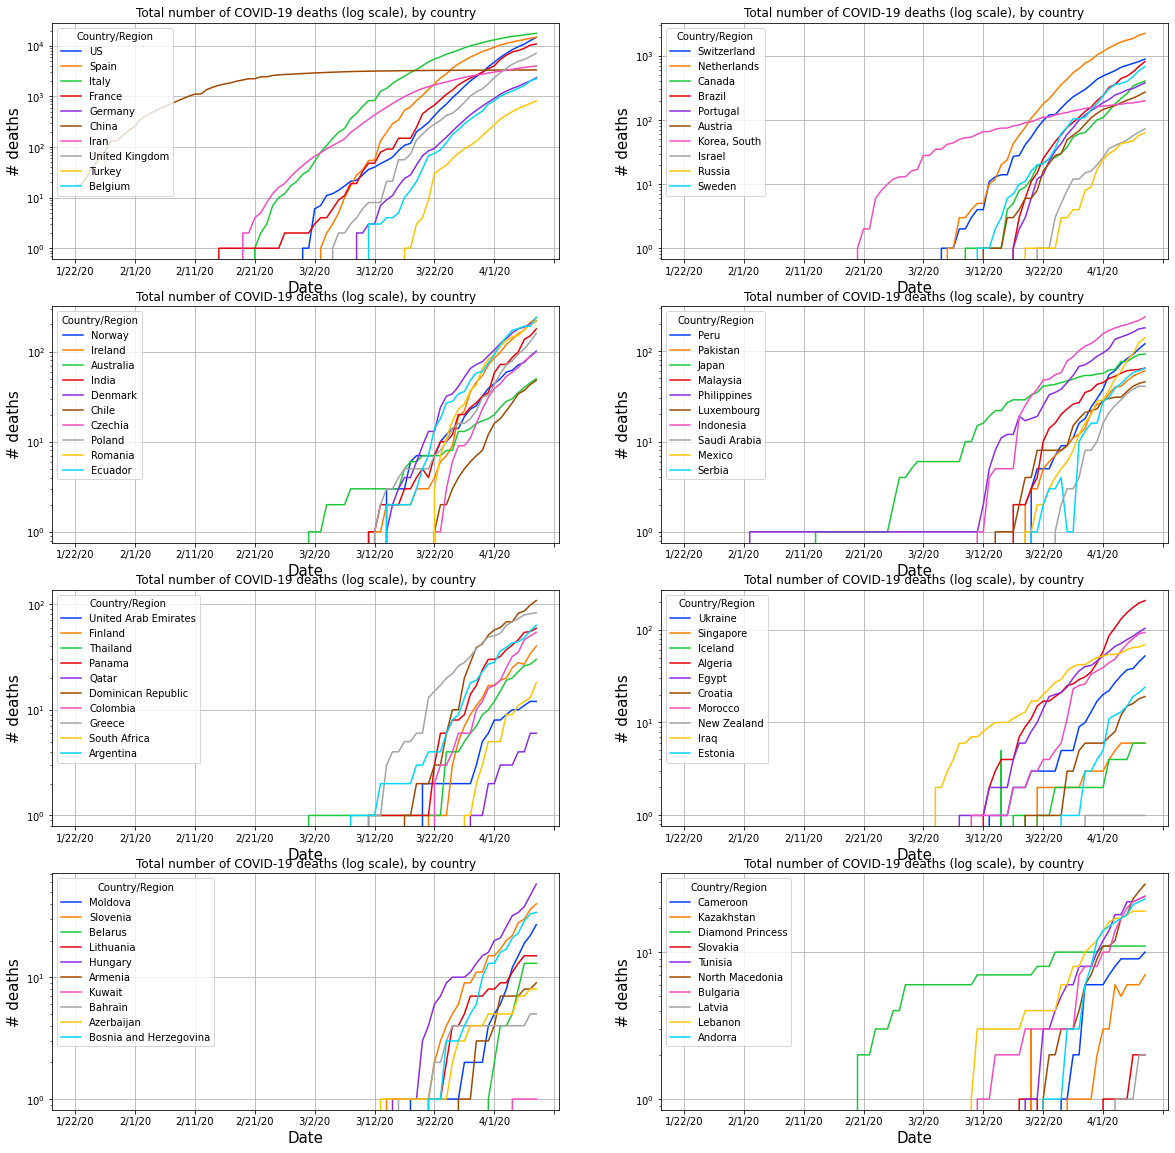

In [11]:
make_plot(dataset=deaths, nrow=4,ncol=2, contries_ordered=contries_ordered,
          title='Total number of COVID-19 deaths (linear scale), by country',
          xlabel="Date", ylabel="# deaths")

make_plot(dataset=deaths, nrow=4,ncol=2, contries_ordered=contries_ordered,
          title='Total number of COVID-19 deaths (log scale), by country',
          xlabel="Date", ylabel="# deaths",
         logy=True)

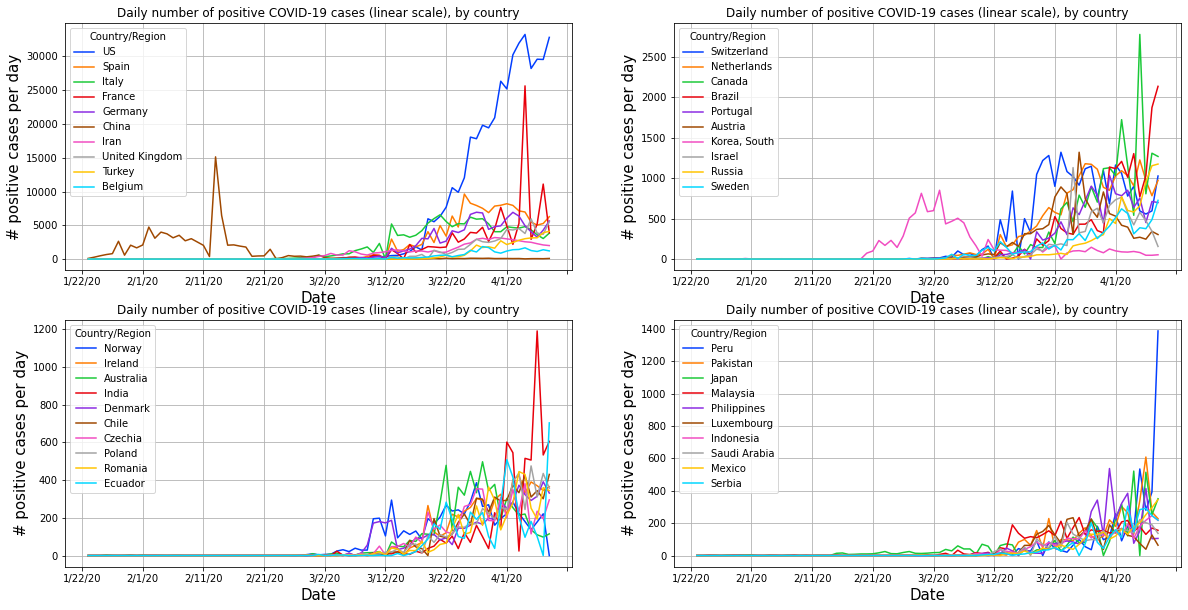

In [12]:
conf_daily = conf - conf.shift(1)

make_plot(dataset=conf_daily, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Daily number of positive COVID-19 cases (linear scale), by country',
          xlabel="Date", ylabel="# positive cases per day")

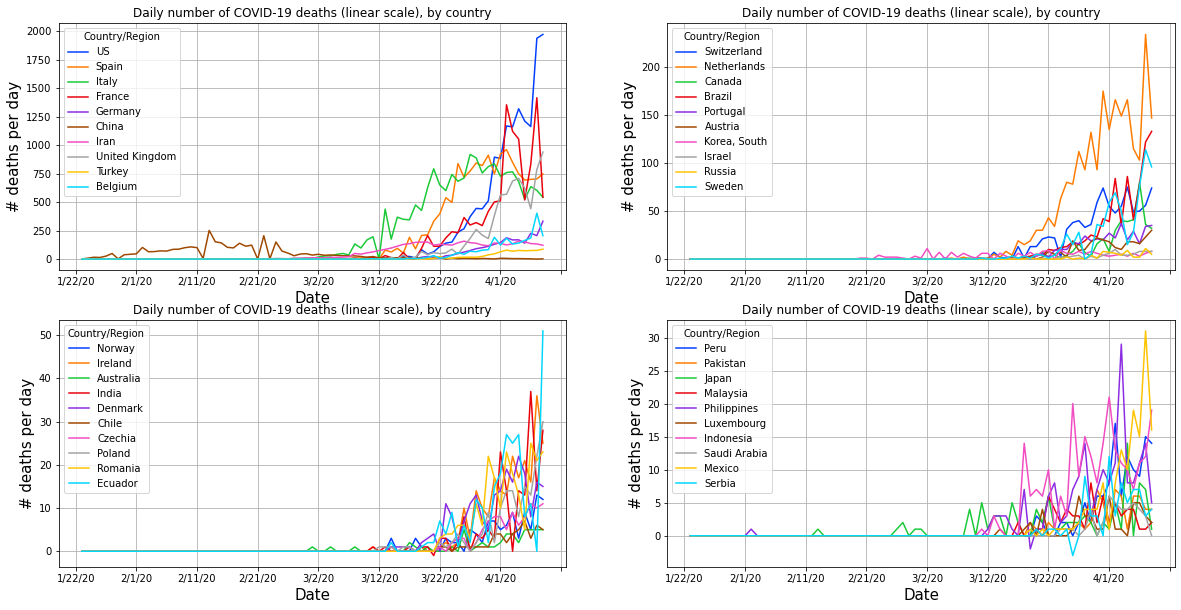

In [13]:
deaths_daily = deaths - deaths.shift(1)

make_plot(dataset=deaths_daily, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Daily number of COVID-19 deaths (linear scale), by country',
          xlabel="Date", ylabel="# deaths per day")

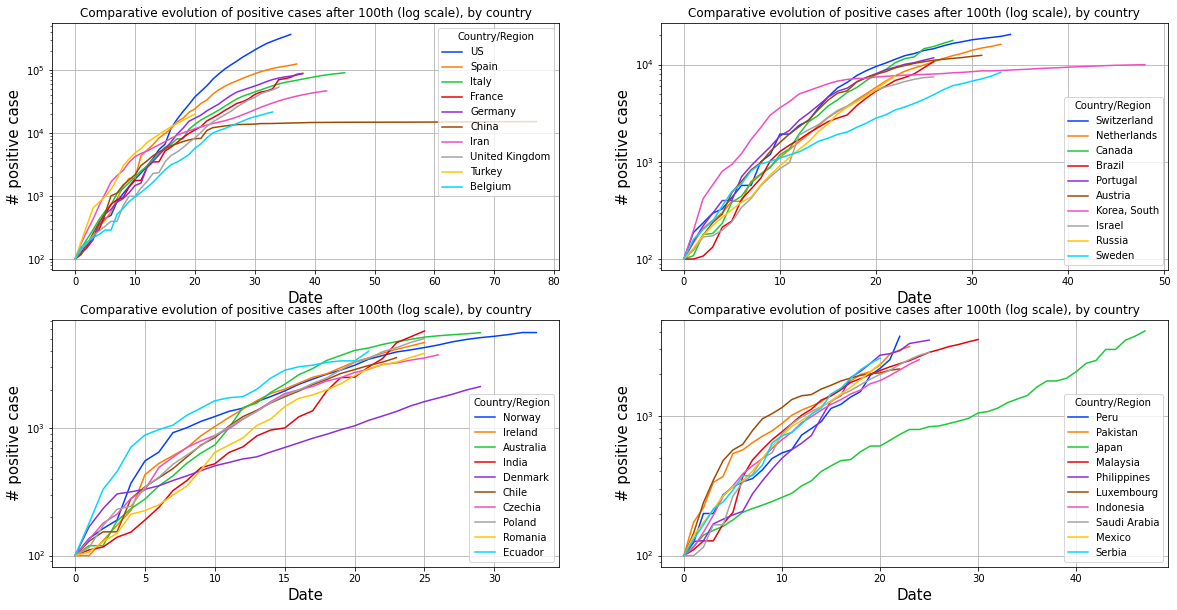

In [14]:
count_after = 100
conf_align_start = conf[conf > count_after]
conf_align_start = conf_align_start.apply(lambda x: pd.Series(x.dropna().values))
conf_align_start = conf_align_start.loc[:].div(conf_align_start.iloc[0][:]/count_after) # normalize to same start

make_plot(dataset=conf_align_start, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Comparative evolution of positive cases after 100th (log scale), by country',
          xlabel="Date", ylabel="# positive case",
         logy=True)

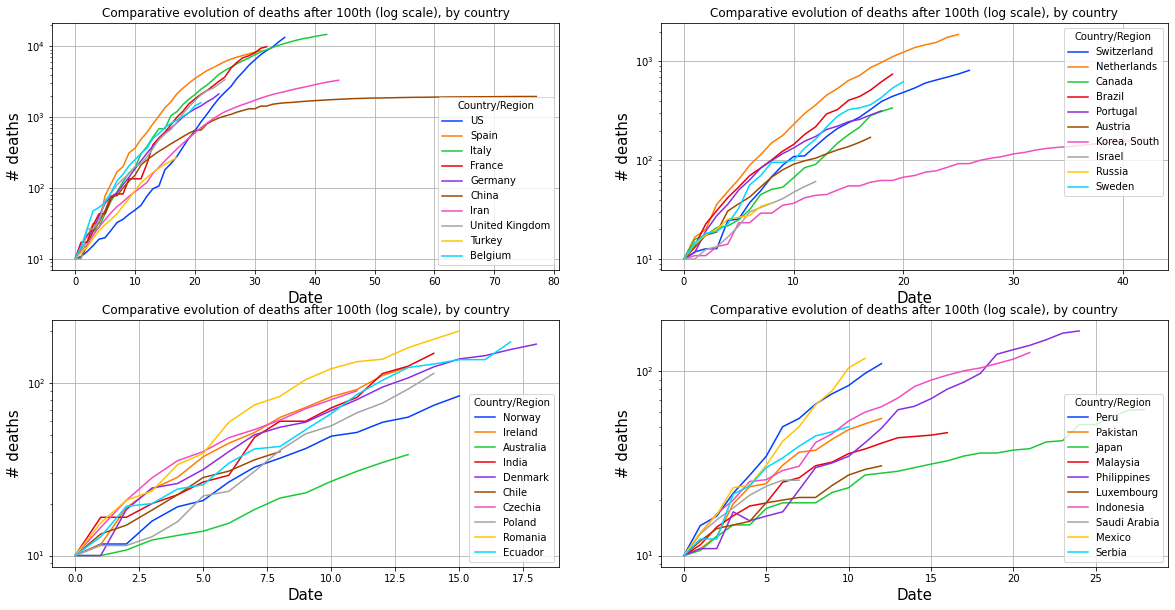

In [15]:
count_after = 10
deaths_align_start = deaths[deaths > count_after] 
deaths_align_start = deaths_align_start.apply(lambda x: pd.Series(x.dropna().values))
deaths_align_start = deaths_align_start.loc[:].div(deaths_align_start.iloc[0][:]/count_after)

make_plot(dataset=deaths_align_start, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Comparative evolution of deaths after 100th (log scale), by country',
          xlabel="Date", ylabel="# deaths",
         logy=True)

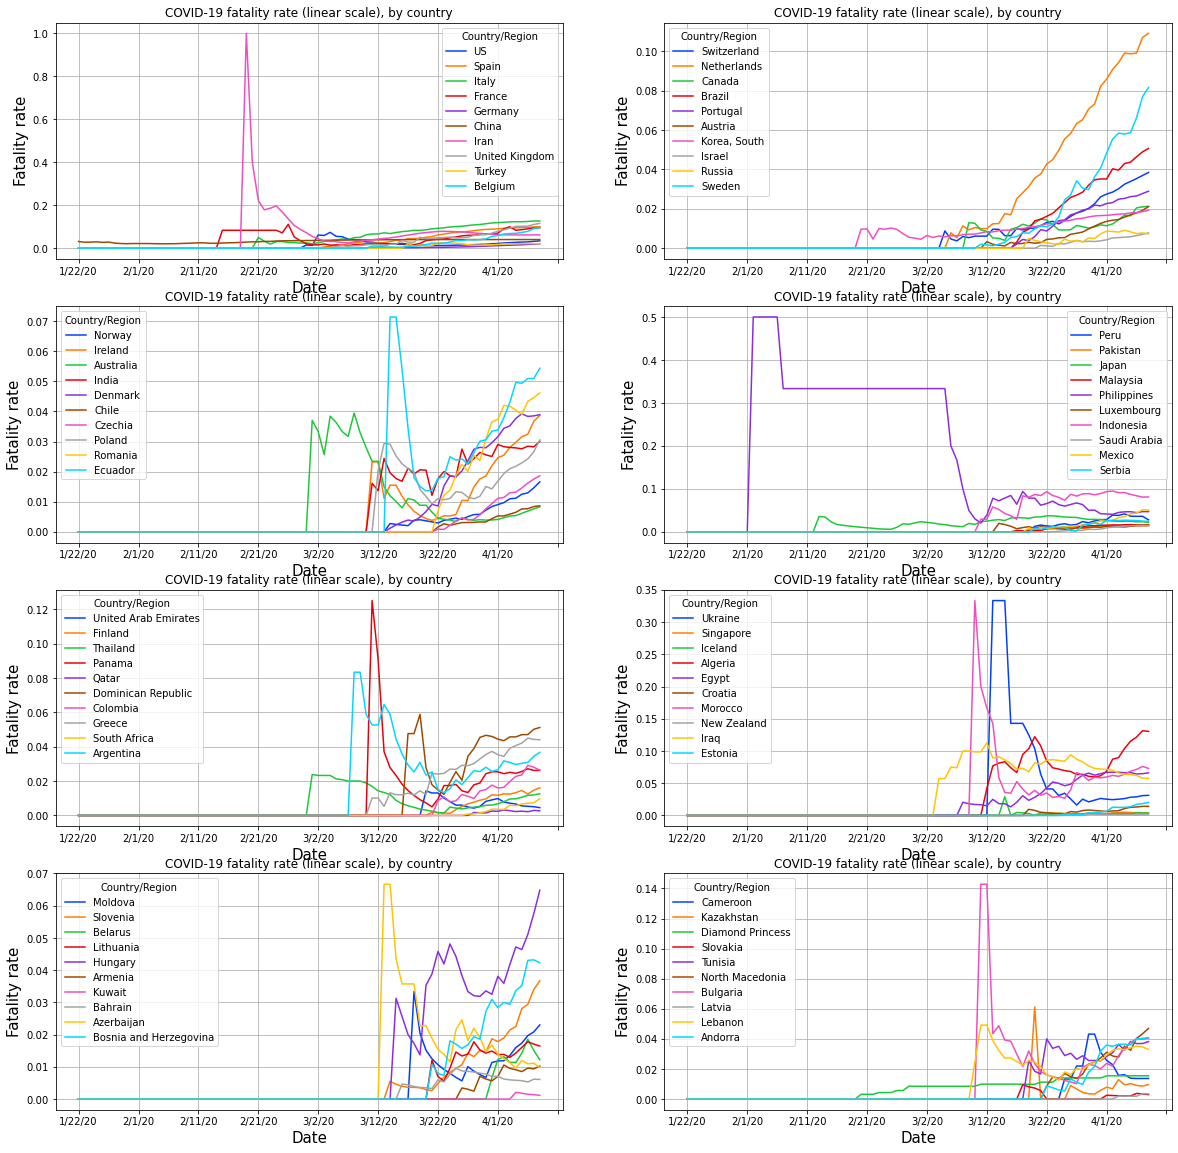

In [16]:
fatality = deaths.divide(conf.replace(0, 1))

make_plot(dataset=fatality, nrow=4,ncol=2, contries_ordered=contries_ordered,
          title='COVID-19 fatality rate (linear scale), by country',
          xlabel="Date", ylabel="Fatality rate")

In [17]:
# retrieve population information
# source https://population.un.org/wpp/Download/Standard/Population/
population = pd.read_csv("../external_data/WPP2019_TotalPopulationBySex.csv")

In [18]:
# select only country codes for year 2020, transpose and remove columns to make it similar to COVID-19 data
population = population[(population["Time"] == 2020) & (population["VarID"] == 2) & (population["LocID"] < 910)]
population = population[["Location","PopTotal"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population.head()
# population numbers are expressed in 1e3

Location,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,World,Yemen,Zambia,Zimbabwe
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,33469.2,307.15,28435.9,97338.6,11.246,597.33,7.7948e+06,29826,18384,14862.9


In [19]:
# list country names
# set(list(population.columns.values))

In [20]:
# rename population country names that don't match COVID-19 data
population = population.rename(columns={
 'Bolivia (Plurinational State of)': 'Bolivia',
 'Brunei Darussalam': 'Brunei',
 'Congo (Kinshasa)': 'Congo',
 "Cote d'Ivoire":  "Côte d'Ivoire",
 'Iran (Islamic Republic of)':  'Iran',
 'Republic of Korea': 'Korea, South',
 'Republic of Moldova':  'Moldova',
 'Russian Federation':  'Russia',
 'China, Taiwan Province of China':  'Taiwan*',
 'United States of America':  'US',
 'Viet Nam':  'Vietnam'
    }
        )

In [21]:
# concatenate dataset
conf_pop_norm = pd.concat([population,conf])
conf_pop_norm.head()

,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Congo (Kinshasa),Cote d'Ivoire,Diamond Princess,Kosovo,Laos,MS Zaandam,Syria,Tanzania,Venezuela,West Bank and Gaza
PopTotal,38928.3,1.3406e+06,2877.8,43851,55.197,77.265,32866.3,15.002,97.928,45195.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/22/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0,NaN,0,0,NaN,0,0,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# divide cases rows by population/10 row to obtain number of cases per 1e4 persons
conf_pop_norm = conf_pop_norm.loc[:].div(conf_pop_norm.iloc[0][:]/10)

In [23]:
# remove population row
conf_pop_norm = conf_pop_norm.iloc[1:]
conf_pop_norm.dropna(axis=1, inplace=True)
conf_pop_norm.tail()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,US,Uruguay,Uzbekistan,Vietnam,Western Sahara,Zambia,Zimbabwe
4/4/20,0.0768078,1.15713,0.285284,60.3119,0.00304263,1.53174,0.321048,2.59851,2.17648,13.0807,...,0.280104,1.52168,6.25711,9.33074,1.1515,0.0794761,0.0246562,0,0.0212141,0.00605533
4/5/20,0.0896519,1.25443,0.301019,64.8418,0.00425969,1.53174,0.321048,2.774,2.23021,13.3805,...,0.299082,1.81894,7.1349,10.1834,1.1515,0.102184,0.0247589,0.0669647,0.0212141,0.00605533
4/6/20,0.0942758,1.31003,0.324508,67.948,0.00486821,1.53174,0.343837,2.81112,2.27334,13.6536,...,0.301598,2.09901,7.701,11.0775,1.16877,0.136543,0.0251699,0.0669647,0.0212141,0.00672815
4/7/20,0.108661,1.33088,0.33477,70.5365,0.00517248,1.9402,0.360211,2.87861,2.31178,14.0334,...,0.334296,2.38514,8.24161,11.9704,1.22059,0.155367,0.0255808,0.0669647,0.0212141,0.00740096
4/8/20,0.114056,1.38995,0.358486,72.9955,0.005781,1.9402,0.37946,2.9731,2.35687,14.3698,...,0.381399,2.68847,9.05547,12.9622,1.22059,0.162836,0.0257863,0.0669647,0.0212141,0.00740096


In [24]:
contries_pop_norm_ordered = conf_pop_norm.max().sort_values(ascending=False)
small_countries = ["San Marino", "Holy See"]

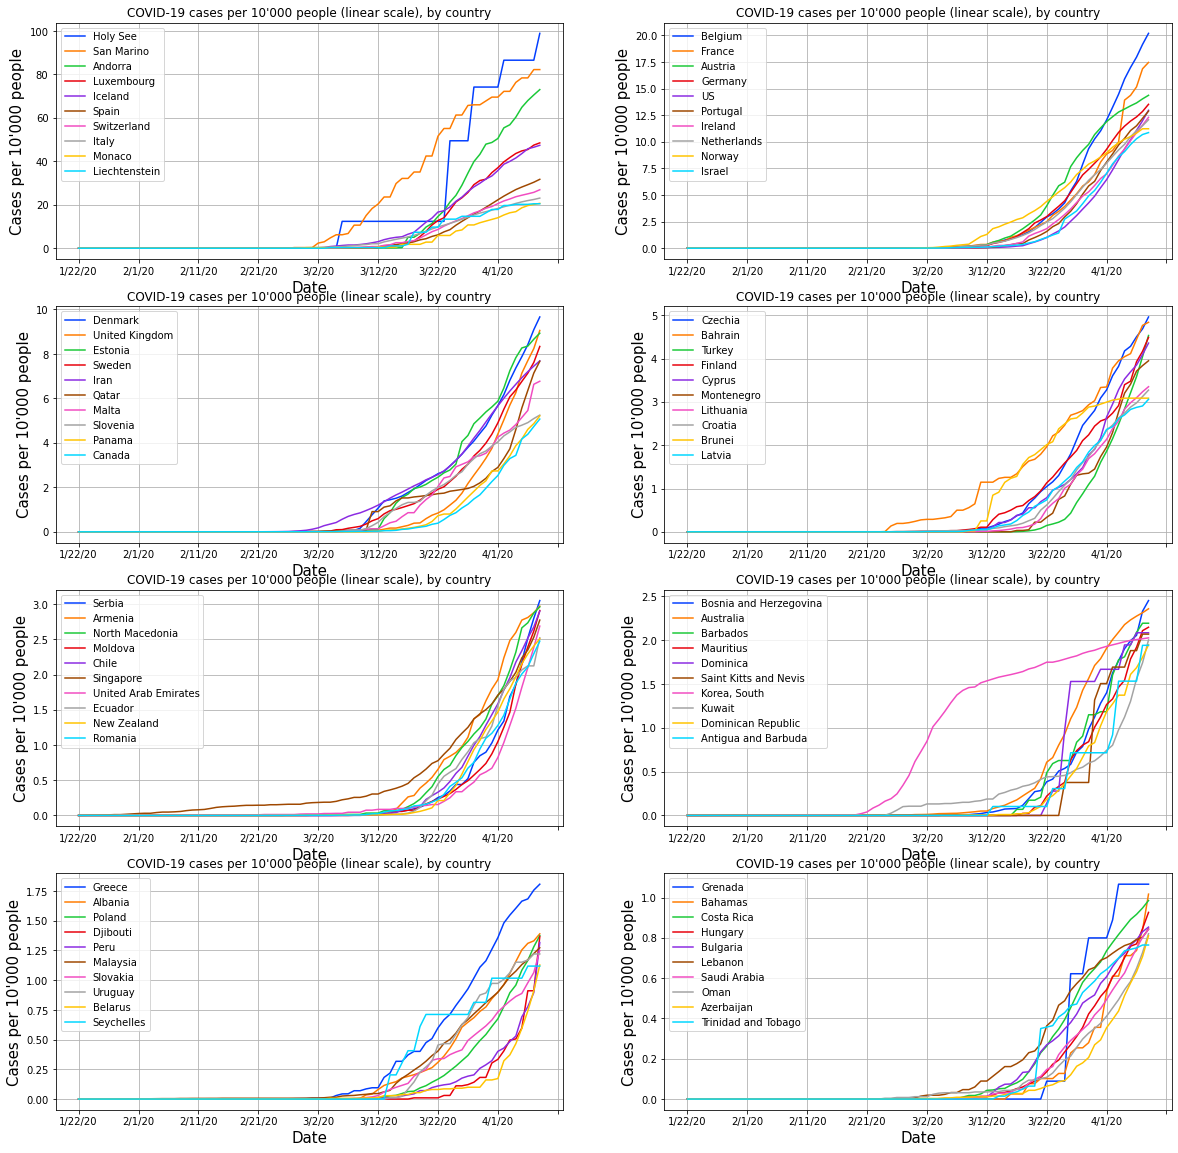

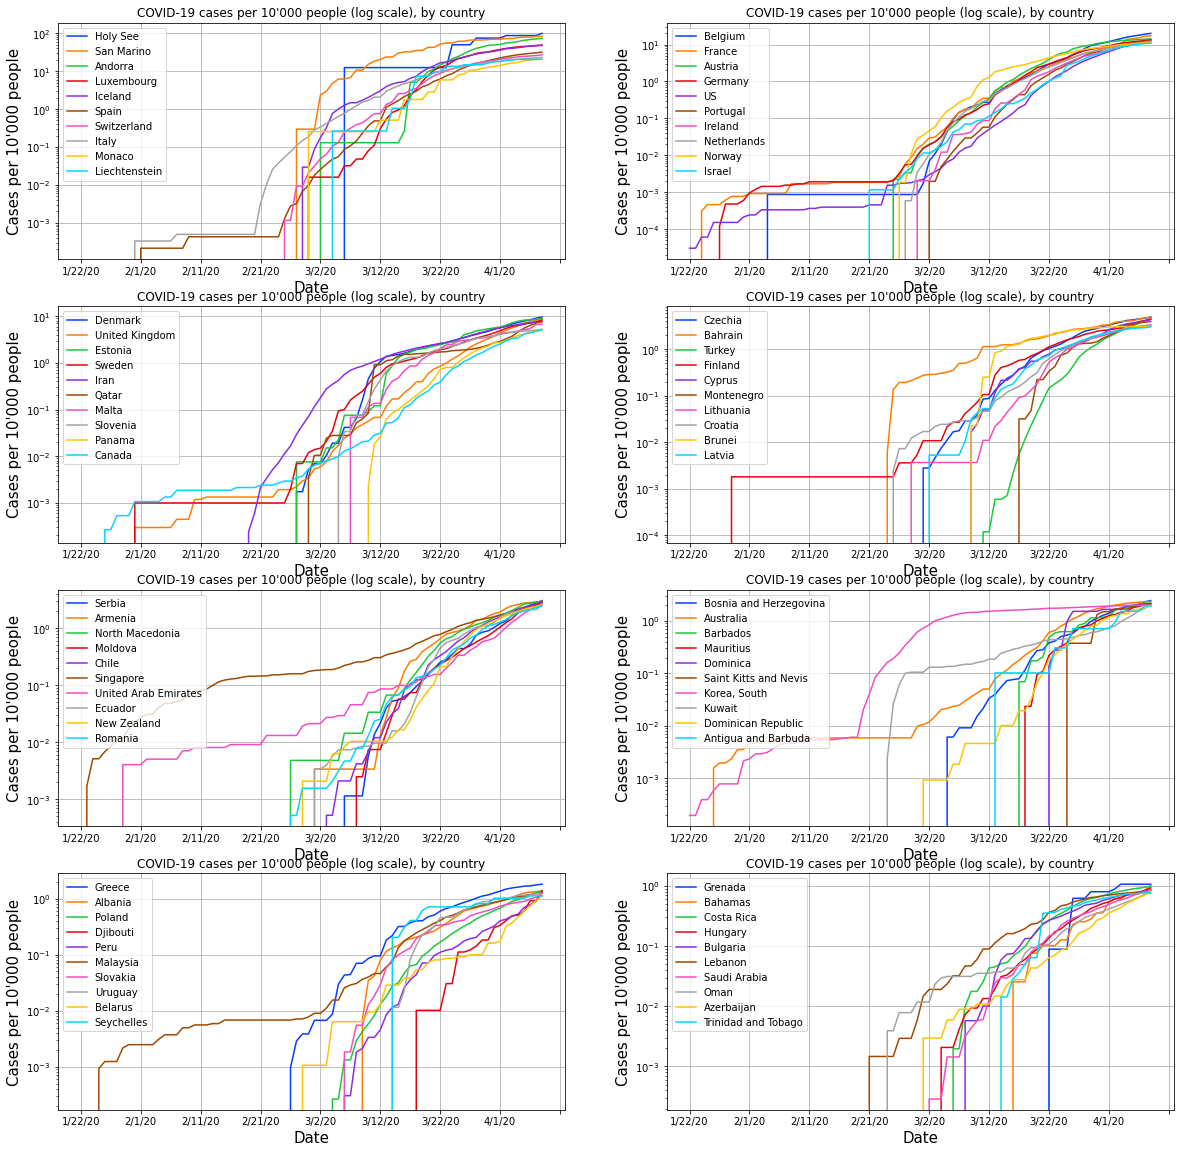

In [25]:
make_plot(dataset=conf_pop_norm, nrow=4,ncol=2, contries_ordered=contries_pop_norm_ordered,
          title="COVID-19 cases per 10'000 people (linear scale), by country",
          xlabel="Date", ylabel="Cases per 10'000 people")

make_plot(dataset=conf_pop_norm, nrow=4,ncol=2, contries_ordered=contries_pop_norm_ordered,
          title="COVID-19 cases per 10'000 people (log scale), by country",
          xlabel="Date", ylabel="Cases per 10'000 people",
         logy=True)

In [26]:
# Source: https://ourworldindata.org/coronavirus-testing-source-data

# Handle test data
tests = pd.read_excel("../external_data/Worldwide_COVID19_tests.xlsx").transpose()
# tests.set_index('Date', inplace=True)
tests = tests.rename(columns=tests.iloc[0])
tests = tests.iloc[1:]
tests = tests.dropna(axis=1)
tests = tests.iloc[0:2].transpose()
tests.head()

,Total tests,Date
Armenia,813,2020-03-18
Australia – Queensland,27000,2020-03-19
Australia – New South Wales,"39,089",2020-03-19
Australia – Australian Capital Territory,2062,2020-03-20
Australia – Western Australia,8603,2020-03-19


In [27]:
test_conf = tests.copy()
test_conf["conf"] = np.nan
test_conf["deaths"] = np.nan

for i, country in enumerate(test_conf.index.to_list()):
    # test_conf["conf"][i] = 0
    # test_conf["deaths"][i] = 0
    if country in conf.columns.to_list():
        test_date = test_conf["Date"][i].date().strftime("%#m/%#d/%y")
        if test_date in conf.index.tolist():
            test_conf["conf"][i] = conf[country].loc[ test_date ]
            test_conf["deaths"][i] = deaths[country].loc[ test_date ]

test_conf.dropna(inplace=True)

print(test_conf.info())
print(test_conf.head())
print(test_conf.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Armenia to Vietnam
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Total tests  50 non-null     object        
 1   Date         50 non-null     datetime64[ns]
 2   conf         50 non-null     float64       
 3   deaths       50 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.0+ KB
None
          Total tests       Date    conf  deaths
Armenia           813 2020-03-18    84.0     0.0
Australia      113615 2020-03-20   791.0     7.0
Austria         15613 2020-03-20  2388.0     6.0
Bahrain         18645 2020-03-20   285.0     1.0
Belarus         16000 2020-03-16    36.0     0.0
                     Total tests       Date    conf  deaths
Turkey                      2900 2020-03-10     0.0     0.0
Ukraine                      316 2020-03-20    29.0     3.0
United Arab Emirates     125,000 2020-03-16    9

C:\Users\luca.perrozzi\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\luca.perrozzi\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


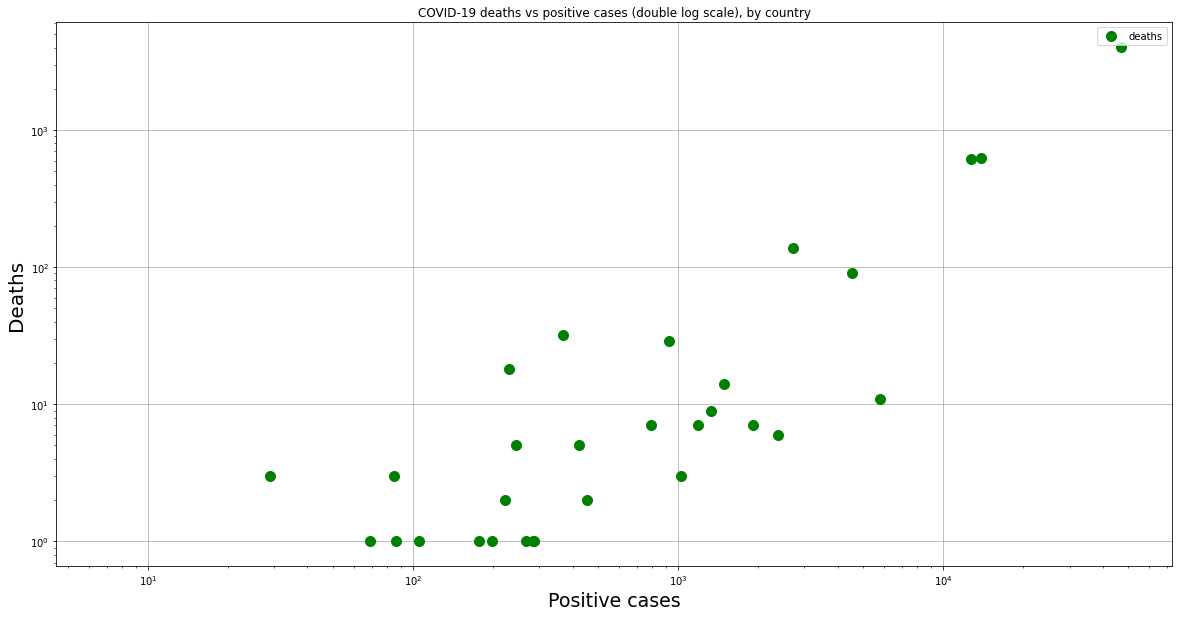

In [28]:
nrow=1
ncol=1
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        test_conf.plot("conf","deaths", color='green', marker='o', linewidth=0, markersize=10, 
                       logy=True, logx=True, grid=True, ax=axes,
                       title="COVID-19 deaths vs positive cases (double log scale), by country", figsize = (20,10))
        axes.set_xlabel("Positive cases", fontsize=19)
        axes.set_ylabel("Deaths", fontsize=20)
        count+=1
        #for i, txt in enumerate(test_conf.columns.to_list()):
        #    axes[r,c].annotate(txt, (test_conf["conf"][i], test_conf["deaths"][i]))

        break
        


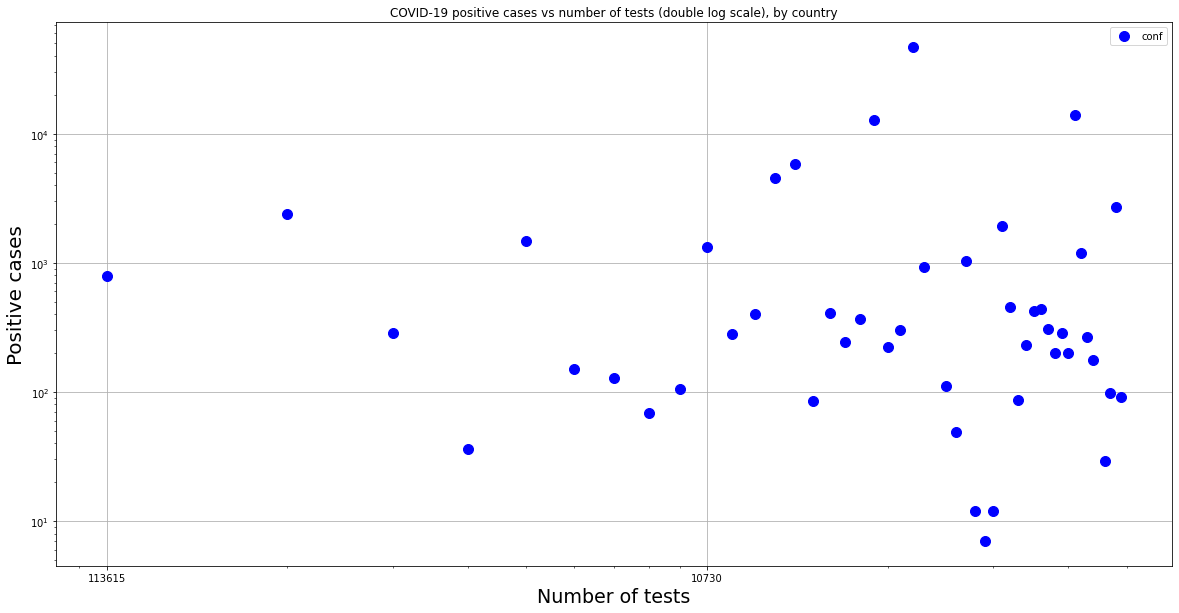

In [29]:
nrow=1
ncol=1
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        test_conf.plot("Total tests","conf", color='blue', marker='o', linewidth=0, markersize=10, 
                       logy=True, logx=True, grid=True, ax=axes,
                       title="COVID-19 positive cases vs number of tests (double log scale), by country", figsize = (20,10))
        axes.set_xlabel("Number of tests", fontsize=19)
        axes.set_ylabel("Positive cases", fontsize=20)
        count+=1
        #for i, txt in enumerate(test_conf.columns.to_list()):
        #    axes[r,c].annotate(txt, (test_conf["conf"][i], test_conf["deaths"][i]))

        break
        


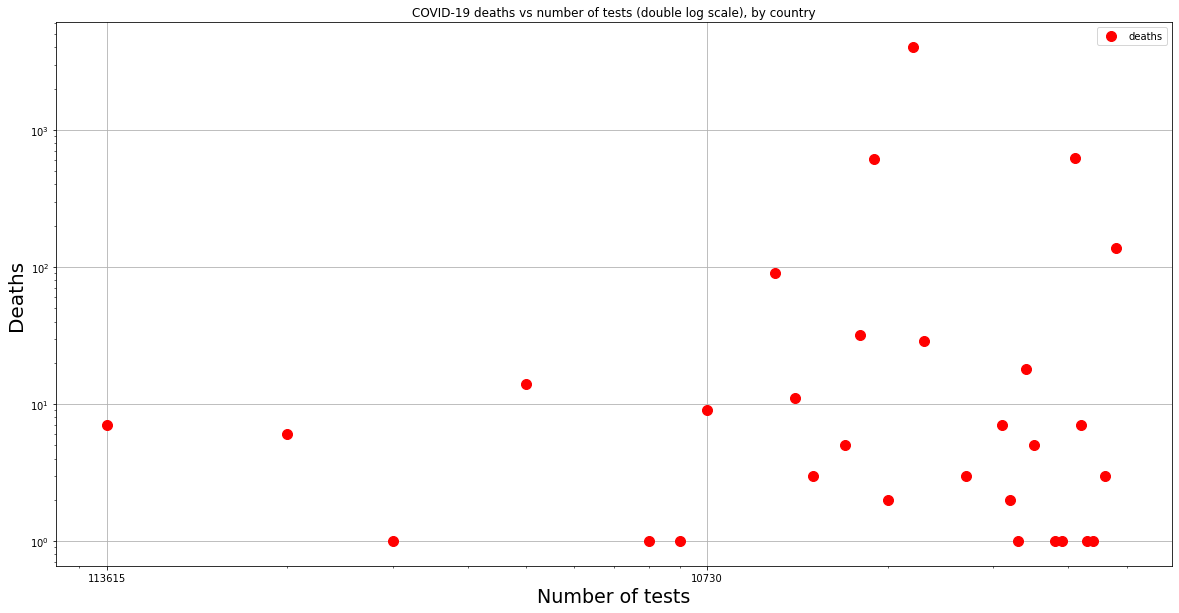

In [30]:
nrow=1
ncol=1
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        test_conf.plot("Total tests","deaths", color='red', marker='o', linewidth=0, markersize=10, 
                       logy=True, logx=True, grid=True, ax=axes,
                       title="COVID-19 deaths vs number of tests (double log scale), by country", figsize = (20,10))
        axes.set_xlabel("Number of tests", fontsize=19)
        axes.set_ylabel("Deaths", fontsize=20)
        count+=1
        #for i, txt in enumerate(test_conf.columns.to_list()):
        #    axes[r,c].annotate(txt, (test_conf["conf"][i], test_conf["deaths"][i]))

        break
        
